In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [4]:
import os
import pandas as pd

os.chdir('C:\\Users\\meric\Desktop\codes\poc\CCDATASET')
df_upload=pd.read_csv('fraudTrain.csv',delimiter=',')
df_upload

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
df_main=df_upload[df_upload["is_fraud"]==0]
df_main

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [6]:
df_main['Dates_Date'] = pd.to_datetime(df_main['trans_date_trans_time'])
df_main['YYYY-MM']=df_main['Dates_Date'].dt.strftime('%Y%m')
df_main['dob_year'] = pd.to_datetime(df_main['dob']).dt.year
df_main

C:\Users\meric\AppData\Local\Temp/ipykernel_14700/3094783802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Dates_Date'] = pd.to_datetime(df_main['trans_date_trans_time'])
C:\Users\meric\AppData\Local\Temp/ipykernel_14700/3094783802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['YYYY-MM']=df_main['Dates_Date'].dt.strftime('%Y%m')
C:\Users\meric\AppData\Local\Temp/ipykernel_14700/3094783802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Dates_Date,YYYY-MM,dob_year
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:18,201901,1988
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:44,201901,1978
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:51,201901,1962
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:01:16,201901,1967
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:03:06,201901,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020-06-21 12:12:08,202006,1961
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020-06-21 12:12:19,202006,1979
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020-06-21 12:12:32,202006,1967
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020-06-21 12:13:36,202006,1980


In [8]:
df_main['sum_by_cc_num_month'] = df_main.groupby(['YYYY-MM','cc_num'])['amt'].transform('sum')
df_main

C:\Users\meric\AppData\Local\Temp/ipykernel_14700/4245947557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['sum_by_cc_num_month'] = df_main.groupby(['YYYY-MM','cc_num'])['amt'].transform('sum')


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,Dates_Date,YYYY-MM,dob_year,sum_amt_by_cc_num,sum_by_cc_num_month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:18,201901,1988,8417.70,8417.70
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:44,201901,1978,7680.17,7680.17
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:51,201901,1962,1334.86,1334.86
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:01:16,201901,1967,671.38,671.38
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:03:06,201901,1986,8078.63,8078.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020-06-21 12:12:08,202006,1961,3743.39,3743.39
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020-06-21 12:12:19,202006,1979,1749.20,1749.20
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020-06-21 12:12:32,202006,1967,6434.65,6434.65
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020-06-21 12:13:36,202006,1980,8738.51,8738.51


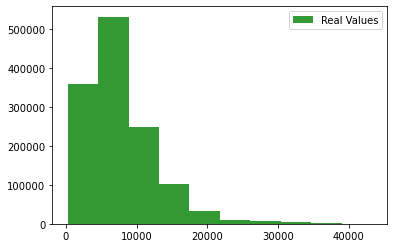

In [33]:
import random
import numpy
from matplotlib import pyplot

pyplot.hist(df_main["sum_amt_by_cc_num"], alpha=0.8, label='Real Values',color = "green")
pyplot.legend(loc='upper right')
pyplot.show()

In [34]:
conditions = [
    (df_main["sum_amt_by_cc_num"] <= 5000),
    (df_main["sum_amt_by_cc_num"] > 5000) & (df_main["sum_amt_by_cc_num"] <= 10000),
    (df_main["sum_amt_by_cc_num"] > 10000) & (df_main["sum_amt_by_cc_num"] <= 15000),
    (df_main["sum_amt_by_cc_num"] > 15000) & (df_main["sum_amt_by_cc_num"] <= 20000),
    (df_main["sum_amt_by_cc_num"] > 20000)
    ]

values_by_val = [1, 2, 3, 4, 5]
values_by_avg = ['2500', '7500', '12500', '17500', '25000+']

df_main['TARGET_CAT'] = np.select(conditions, values_by_val)
df_main['TARGET_CAT_VAL'] = np.select(conditions, values_by_avg)

# df_main
df_main[df_main["TARGET_CAT"]==0]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,Dates_Date,YYYY-MM,dob_year,sum_amt_by_cc_num,TARGET_CAT,TARGET_CAT_VAL


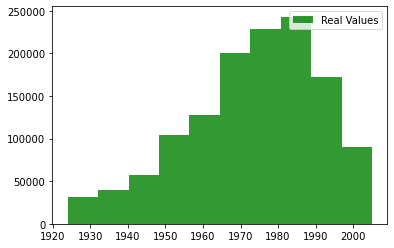

In [35]:
import random
import numpy
from matplotlib import pyplot

pyplot.hist(df_main["dob_year"], alpha=0.8, label='Real Values',color = "green")
pyplot.legend(loc='upper right')
pyplot.show()

In [36]:
conditions = [
    (df_main["dob_year"] <= 1950),
    (df_main["dob_year"] > 1950) & (df_main["dob_year"] <= 1960),
    (df_main["dob_year"] > 1960) & (df_main["dob_year"] <= 1970),
    (df_main["dob_year"] > 1970) & (df_main["dob_year"] <= 1980),
    (df_main["dob_year"] > 1980) & (df_main["dob_year"] <= 1990),
    (df_main["dob_year"] > 1990) & (df_main["dob_year"] <= 2000),
    (df_main["dob_year"] > 2000)
    ]

values_by_dob_cat_val = [1, 2, 3, 4, 5,6,7]
values_by_dob_cat_val_str = ['Before 1950', '1950-1960', '1961-1970', '1971-1980', '1981-1990','1991-2000','2000+']

df_main['DOB_CAT'] = np.select(conditions, values_by_dob_cat_val)
df_main['DOB_CAT_STR'] = np.select(conditions, values_by_dob_cat_val_str)

df_main

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,Dates_Date,YYYY-MM,dob_year,sum_amt_by_cc_num,TARGET_CAT,TARGET_CAT_VAL,DOB_CAT,DOB_CAT_STR
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-82.048315,0,2019-01-01 00:00:18,201901,1988,8417.70,2,7500,5,1981-1990
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.186462,0,2019-01-01 00:00:44,201901,1978,7680.17,2,7500,4,1971-1980
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.154481,0,2019-01-01 00:00:51,201901,1962,1334.86,1,2500,3,1961-1970
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.561071,0,2019-01-01 00:01:16,201901,1967,671.38,1,2500,3,1961-1970
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-78.632459,0,2019-01-01 00:03:06,201901,1986,8078.63,2,7500,5,1981-1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-111.690765,0,2020-06-21 12:12:08,202006,1961,3743.39,1,2500,3,1961-1970
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-78.246528,0,2020-06-21 12:12:19,202006,1979,1749.20,1,2500,4,1971-1980
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.130529,0,2020-06-21 12:12:32,202006,1967,6434.65,2,7500,3,1961-1970
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-103.241160,0,2020-06-21 12:13:36,202006,1980,8738.51,2,7500,4,1971-1980


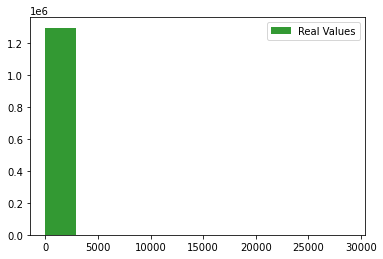

In [37]:
import random
import numpy
from matplotlib import pyplot

pyplot.hist(df_main["amt"], alpha=0.8, label='Real Values',color = "green")
pyplot.legend(loc='upper right')
pyplot.show()

In [38]:
df_main_for_model=df_main[["category","amt","gender","state","dob","DOB_CAT","YYYY-MM","TARGET_CAT"]]
df_main_for_model

,category,amt,gender,state,dob,DOB_CAT,YYYY-MM,TARGET_CAT
0,misc_net,4.97,F,NC,1988-03-09,5,201901,2
1,grocery_pos,107.23,F,WA,1978-06-21,4,201901,2
2,entertainment,220.11,M,ID,1962-01-19,3,201901,1
3,gas_transport,45.00,M,MT,1967-01-12,3,201901,1
4,misc_pos,41.96,M,VA,1986-03-28,5,201901,2
...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,UT,1961-11-24,3,202006,1
1296671,food_dining,51.70,M,MD,1979-12-11,4,202006,1
1296672,food_dining,105.93,M,NM,1967-08-30,3,202006,2
1296673,food_dining,74.90,M,SD,1980-08-18,4,202006,2


In [39]:
gender_dummies = pd.get_dummies(df_main_for_model["gender"], prefix='sex')
df_main_for_model = pd.concat([df_main_for_model, gender_dummies], axis=1)
df_main_for_model


,category,amt,gender,state,dob,DOB_CAT,YYYY-MM,TARGET_CAT,sex_F,sex_M
0,misc_net,4.97,F,NC,1988-03-09,5,201901,2,1,0
1,grocery_pos,107.23,F,WA,1978-06-21,4,201901,2,1,0
2,entertainment,220.11,M,ID,1962-01-19,3,201901,1,0,1
3,gas_transport,45.00,M,MT,1967-01-12,3,201901,1,0,1
4,misc_pos,41.96,M,VA,1986-03-28,5,201901,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,UT,1961-11-24,3,202006,1,0,1
1296671,food_dining,51.70,M,MD,1979-12-11,4,202006,1,0,1
1296672,food_dining,105.93,M,NM,1967-08-30,3,202006,2,0,1
1296673,food_dining,74.90,M,SD,1980-08-18,4,202006,2,0,1


In [40]:
cat_dummies = pd.get_dummies(df_main_for_model["category"], prefix='cat')
df_main_for_model = pd.concat([df_main_for_model, cat_dummies], axis=1)
df_main_for_model


,category,amt,gender,state,dob,DOB_CAT,YYYY-MM,TARGET_CAT,sex_F,sex_M,...,cat_grocery_pos,cat_health_fitness,cat_home,cat_kids_pets,cat_misc_net,cat_misc_pos,cat_personal_care,cat_shopping_net,cat_shopping_pos,cat_travel
0,misc_net,4.97,F,NC,1988-03-09,5,201901,2,1,0,...,0,0,0,0,1,0,0,0,0,0
1,grocery_pos,107.23,F,WA,1978-06-21,4,201901,2,1,0,...,1,0,0,0,0,0,0,0,0,0
2,entertainment,220.11,M,ID,1962-01-19,3,201901,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,gas_transport,45.00,M,MT,1967-01-12,3,201901,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,misc_pos,41.96,M,VA,1986-03-28,5,201901,2,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,UT,1961-11-24,3,202006,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1296671,food_dining,51.70,M,MD,1979-12-11,4,202006,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1296672,food_dining,105.93,M,NM,1967-08-30,3,202006,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1296673,food_dining,74.90,M,SD,1980-08-18,4,202006,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
state_dummies = pd.get_dummies(df_main_for_model["state"], prefix='state')
df_main_for_model = pd.concat([df_main_for_model, state_dummies], axis=1)
df_main_for_model

,category,amt,gender,state,dob,DOB_CAT,YYYY-MM,TARGET_CAT,sex_F,sex_M,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,misc_net,4.97,F,NC,1988-03-09,5,201901,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,grocery_pos,107.23,F,WA,1978-06-21,4,201901,2,1,0,...,0,0,0,0,0,0,1,0,0,0
2,entertainment,220.11,M,ID,1962-01-19,3,201901,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,gas_transport,45.00,M,MT,1967-01-12,3,201901,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,misc_pos,41.96,M,VA,1986-03-28,5,201901,2,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,UT,1961-11-24,3,202006,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1296671,food_dining,51.70,M,MD,1979-12-11,4,202006,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1296672,food_dining,105.93,M,NM,1967-08-30,3,202006,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1296673,food_dining,74.90,M,SD,1980-08-18,4,202006,2,0,1,...,1,0,0,0,0,0,0,0,0,0


In [42]:
DOB_CAT_dummies = pd.get_dummies(df_main_for_model["DOB_CAT"], prefix='dob')
df_main_for_model = pd.concat([df_main_for_model, DOB_CAT_dummies], axis=1)
df_main_for_model

,category,amt,gender,state,dob,DOB_CAT,YYYY-MM,TARGET_CAT,sex_F,sex_M,...,state_WI,state_WV,state_WY,dob_1,dob_2,dob_3,dob_4,dob_5,dob_6,dob_7
0,misc_net,4.97,F,NC,1988-03-09,5,201901,2,1,0,...,0,0,0,0,0,0,0,1,0,0
1,grocery_pos,107.23,F,WA,1978-06-21,4,201901,2,1,0,...,0,0,0,0,0,0,1,0,0,0
2,entertainment,220.11,M,ID,1962-01-19,3,201901,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,gas_transport,45.00,M,MT,1967-01-12,3,201901,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,misc_pos,41.96,M,VA,1986-03-28,5,201901,2,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,UT,1961-11-24,3,202006,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1296671,food_dining,51.70,M,MD,1979-12-11,4,202006,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1296672,food_dining,105.93,M,NM,1967-08-30,3,202006,2,0,1,...,0,0,0,0,0,1,0,0,0,0
1296673,food_dining,74.90,M,SD,1980-08-18,4,202006,2,0,1,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df_train=df_main_for_model.drop(['category', 'gender','state',"dob"], axis=1)

In [44]:
y = df_train["TARGET_CAT"]
df_train.drop(["TARGET_CAT"], axis=1)
X = df_train

df_train

,amt,DOB_CAT,YYYY-MM,TARGET_CAT,sex_F,sex_M,cat_entertainment,cat_food_dining,cat_gas_transport,cat_grocery_net,...,state_WI,state_WV,state_WY,dob_1,dob_2,dob_3,dob_4,dob_5,dob_6,dob_7
0,4.97,5,201901,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,107.23,4,201901,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,220.11,3,201901,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45.00,3,201901,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,41.96,5,201901,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,3,202006,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1296671,51.70,4,202006,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1296672,105.93,3,202006,2,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1296673,74.90,4,202006,2,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances=mutual_info_classif(X_train,y_train)


<function matplotlib.pyplot.show(close=None, block=None)>

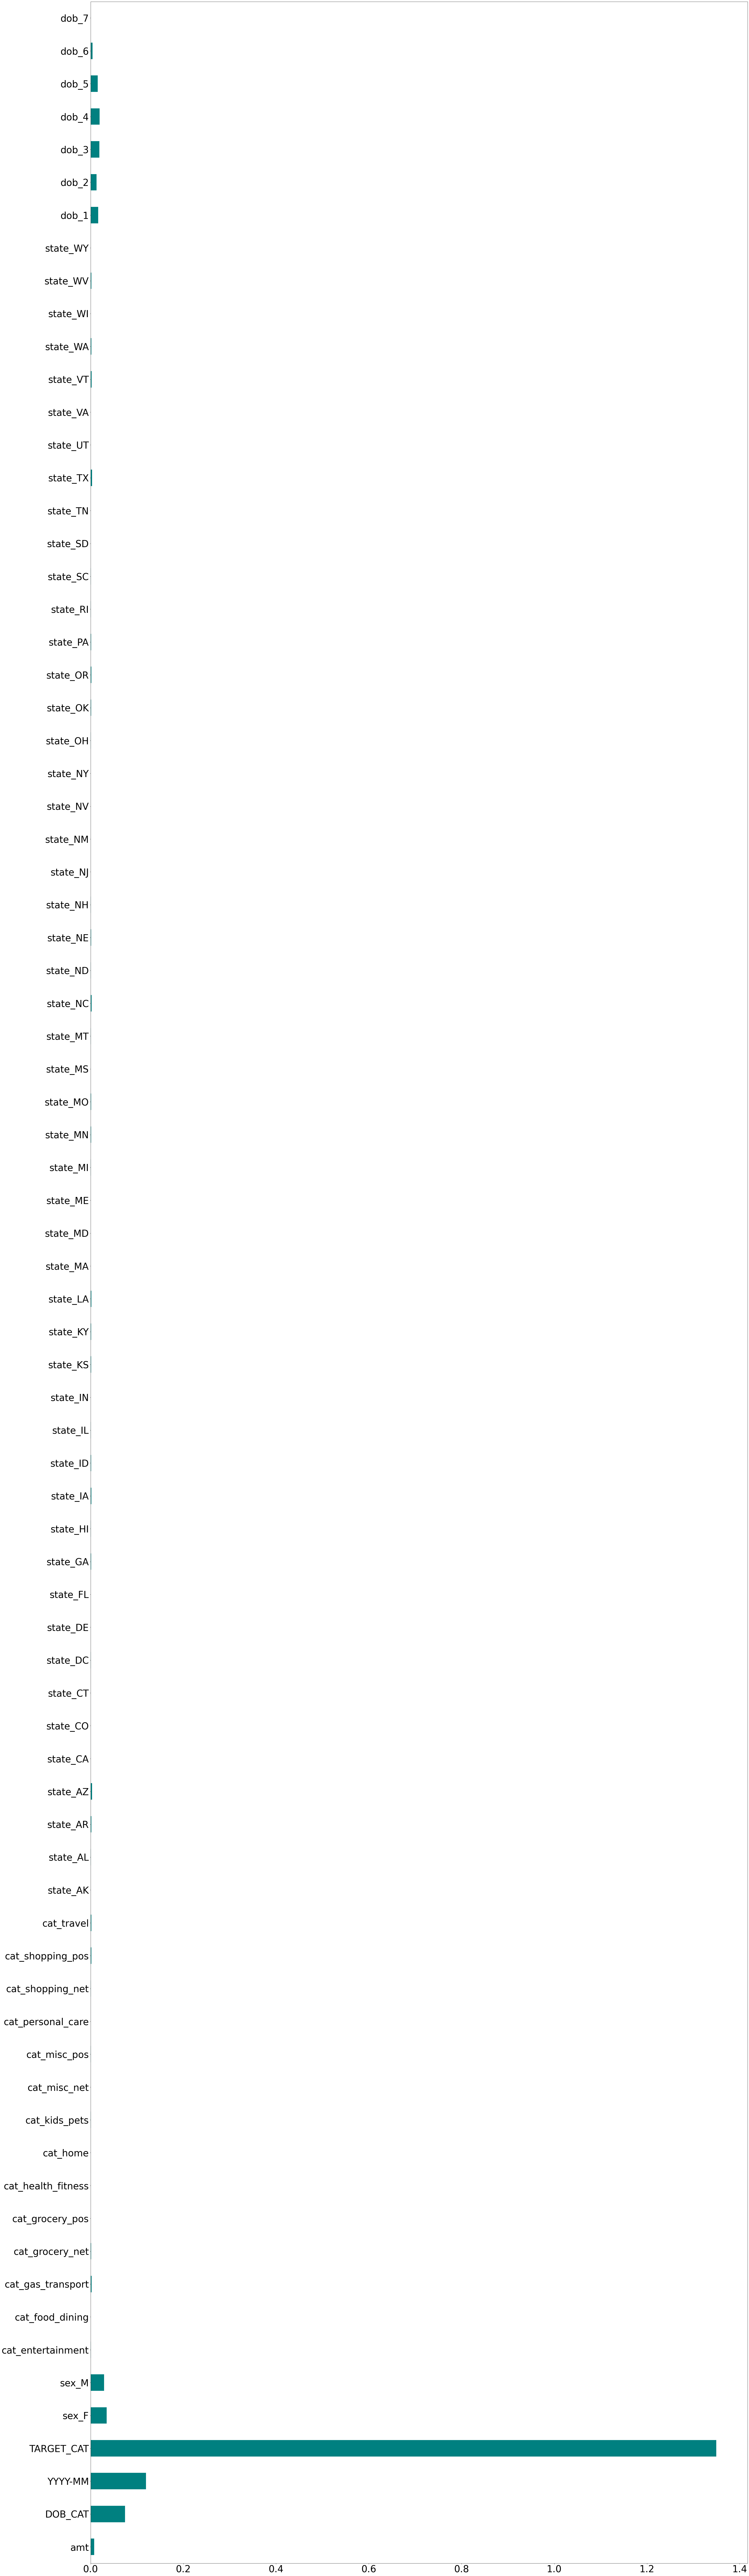

In [47]:
plt.figure(figsize = (50,200))
feat_importances=pd.Series(importances,X_train.columns[0:len(X_train.columns)])
feat_importances.plot(kind='barh',color='teal', fontsize = 40)
plt.show

In [126]:
corrMatrix = df_train.corr()

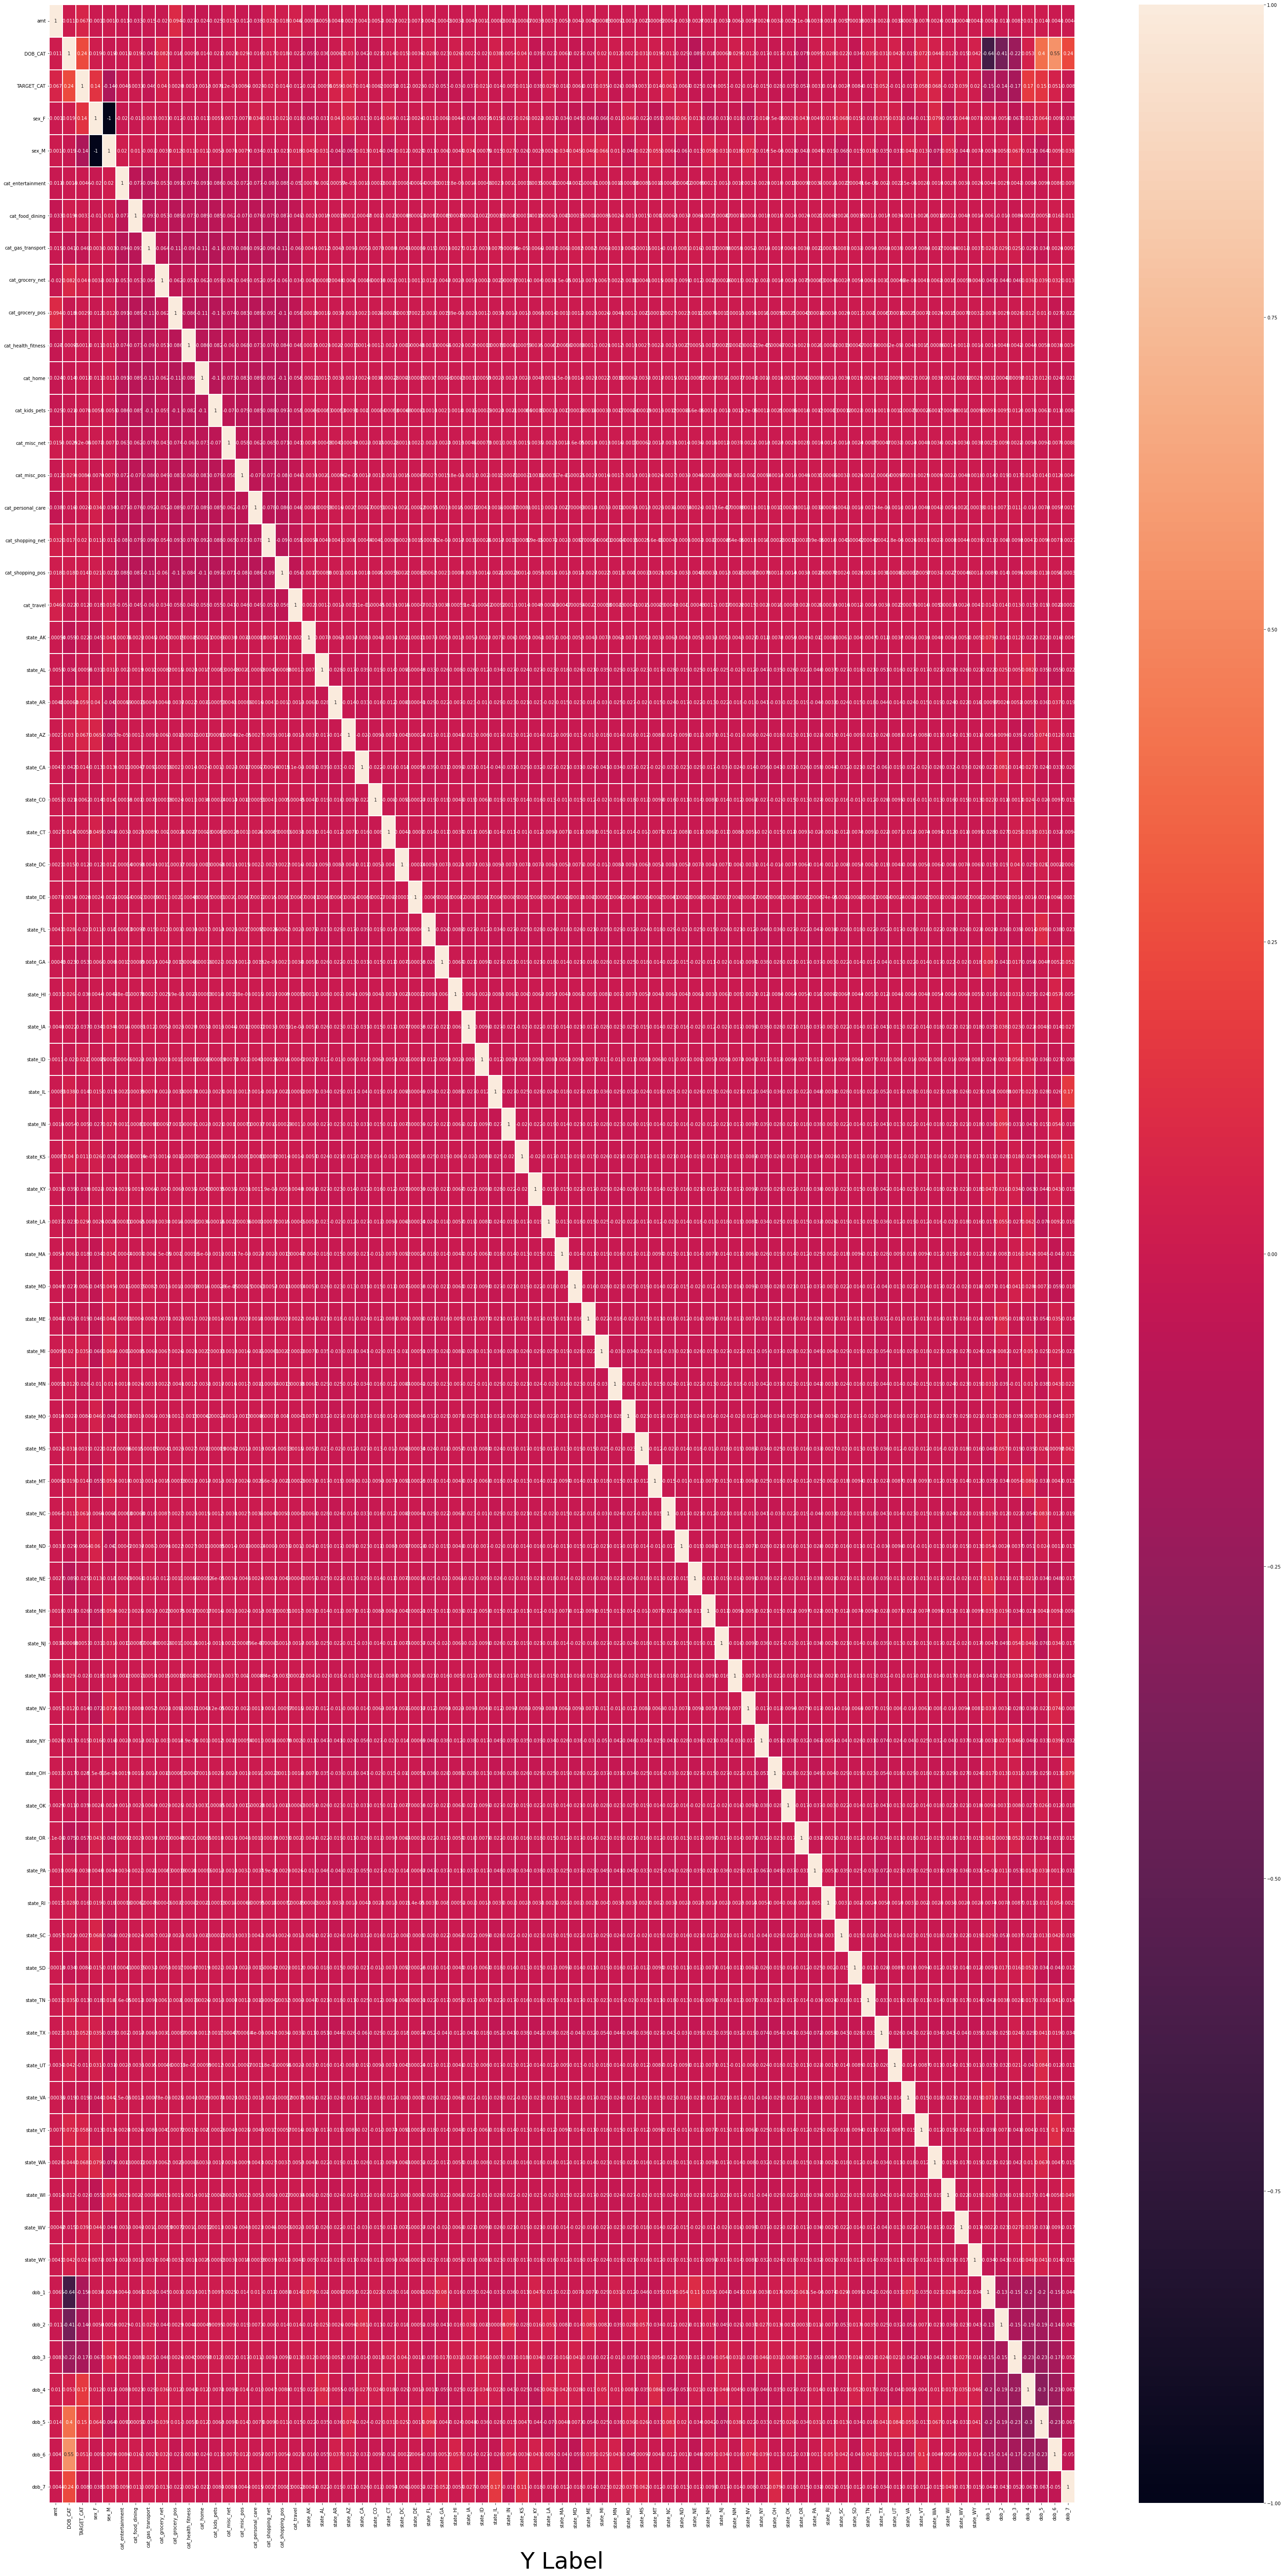

<Figure size 432x288 with 0 Axes>

In [148]:
import seaborn as sn
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10,10))

plt.figure(figsize = (50,100))
a=sn.heatmap(corrMatrix, annot=True,linewidths=.15)
a.set_xlabel("X Label",fontsize=50)
a.set_xlabel("Y Label",fontsize=50)
plt.show()
plt.savefig('correlation.png')

In [51]:
X=X[["sex_M","sex_F","DOB_CAT"]]
X

,sex_M,sex_F,DOB_CAT
0,0,1,5
1,0,1,4
2,1,0,3
3,1,0,3
4,1,0,5
...,...,...,...
1296670,1,0,3
1296671,1,0,4
1296672,1,0,3
1296673,1,0,4


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
knn = KNeighborsClassifier()
np.arange(25,50)
knn_params = {"n_neighbors": np.arange(25,50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)
knn_cv_model.best_score_

In [53]:
cart = DecisionTreeClassifier()
cart_params = {"max_depth": [1,3,5,8,10],
              "min_samples_split": [2,3,5,10,20,50]}
cart_cv_model = GridSearchCV(cart, cart_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)
cart_cv_model.best_score_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


0.461269207781441